In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install ipython-autotime

%load_ext autotime


import pandas as pd
import numpy as np
# import pickle5 as pickle
import re
from nltk.stem import WordNetLemmatizer
import nltk
from tqdm.notebook import tqdm
tqdm.pandas()
import requests

from termcolor import colored
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

nb_workers=10

import os
from datetime import datetime
# import pickle
import ast
import re

import seaborn as sns
from matplotlib import pyplot as plt
sns.set()


my_dir = '/content/drive/MyDrive/Discord-Reddit/'

punctuations = """!"$%()*+,*/:»«";“<=>?[\]^`”|{.}~"""
def clean_text_local(row):
    row=re.sub('\x0c',' ',row)
    row=re.sub('\u200c',' ',row)
    # row=re.sub('\n\n',' . ',row)
    # row=re.sub('\\n',' ',row)

    row=re.sub('\\\\n',' ',row)
    row=re.sub('\n',' ',row)
    
    row=re.sub("-?NEWLINE_TOKEN", " ",row)
    row=re.sub("TAB_TOKEN", " ",row)
    row=re.sub("Alternate option=", "",row)
    row=re.sub('RT',' ',row)
    row = row.lower()
    
    row=re.sub("@[A-Za-z0-9_]+","",row)
    row=re.sub("http\S+|www.\S+","",row)

    row = re.sub(r'<.*?>', ' ', row)
    row = re.sub('\w*\d\w*','',row)
    row=re.sub("&amp","&",row)
#     row=re.sub("\d","",row)
#     row=re.sub(r"\b\d+\b|\b(?![i])[a-z]\b","",row) # removes every isolated number or char except i
    # row = ' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(row)])
    row=re.sub('-',' ',row)
    # no_punct = ""
    # for char in row:
    #     if char not in punctuations:
    #         no_punct = no_punct + char
    row = row.strip()
    row = re.sub('\s+',' ',row)
    return row

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.1 MB/s 
time: 2.37 s (started: 2022-12-22 15:30:37 +00:00)


In [ ]:
import os
discords = os.listdir('/content/drive/MyDrive/Discord-Reddit/Datasets/discord')
subreddits = os.listdir('/content/drive/MyDrive/Discord-Reddit/Datasets/reddit')

# discords.remove('.ipynb_checkpoints')
# subreddits.remove('.ipynb_checkpoints')

time: 768 ms (started: 2022-12-15 13:49:07 +00:00)


In [ ]:
def clean_df(data,text_col,author_col):
  data[text_col]=data[text_col].astype(str)
  # data[text_col]=data[text_col].progress_apply(lambda x: )
  data=data[data[text_col].apply(lambda x: len(x.split(' '))) >= 3]
  data=data[data[author_col]!='error']
  data=data[data[author_col]!=0]
  data=data[data [author_col]!='AutoModerator']
  data.drop_duplicates(subset=text_col, keep='first', inplace=True, ignore_index=False)
  return data

time: 3.8 ms (started: 2022-12-15 15:02:07 +00:00)


In [ ]:
'ds ss  sss'.split(' ')

['ds', 'ss', '', 'sss']

time: 2.91 ms (started: 2022-12-12 16:28:45 +00:00)


In [ ]:
def plot_authors_toxicity(community_name_x, agg_x='mean'):
  if agg_x == 'mean':
    binwidth_x = 0.02
  if agg_x == 'sum':
    binwidth_x = None


  data_reddit=pd.read_csv(f'{my_dir}Datasets/reddit/{community_name_x}_subreddit_hate.csv', lineterminator='\n')
  data_discord=pd.read_csv(f'{my_dir}Datasets/discord/{community_name_x}_discord_hate.csv', lineterminator='\n')

  data_reddit=clean_df(data_reddit,text_col='comment_text',author_col='author')
  data_discord=clean_df(data_discord,text_col='content',author_col='author_username')

  data_reddit_authors = data_reddit.groupby(by=['author'])['Toxic_BERT'].agg([agg_x, 'count']).reset_index()
  data_reddit_authors = data_reddit_authors[data_reddit_authors['count'] >= 10]


  data_discord_authors = data_discord.groupby(by=['author_username'])['Toxic_BERT'].agg([agg_x, 'count']).reset_index()
  data_discord_authors = data_discord_authors[data_discord_authors['count'] >= 10]

  
  fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
  fig.suptitle(f'{community_name_x}',fontsize=20)

  # Reddit
  sns.histplot(ax=axes[0], data=data_reddit_authors, x=agg_x, kde=True, stat='density',binwidth=binwidth_x, color='red')
  axes[0].set_title('Subreddit')
  if agg_x == 'mean':
    axes[0].set_xlim(0,1)
  if agg_x == 'sum':
    axes[0].set_xlim(0,200)

  # Discord
  sns.histplot(ax=axes[1], data=data_discord_authors, x=agg_x, kde=True, stat='density',binwidth=binwidth_x, color='blue')
  axes[1].set_title('Discord Server')
  if agg_x == 'mean':
    axes[1].set_xlim(0,1)
  if agg_x == 'sum':
    axes[1].set_xlim(0,200)
  # plt.savefig(my_dir+f"Charts/User_Toxicity/{community_name_x}_User_Toxicity_{agg_x}", bbox_inches = 'tight',format="jpeg", dpi=350)
  plt.show()

time: 9.15 ms (started: 2022-12-07 19:04:37 +00:00)


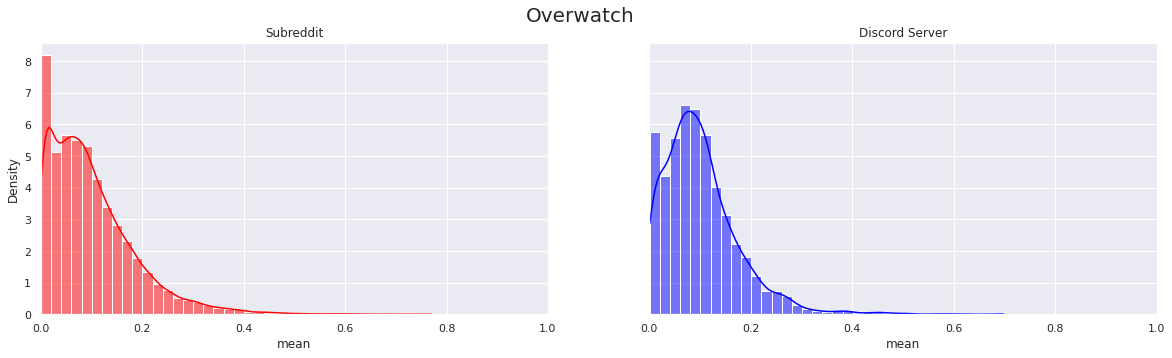

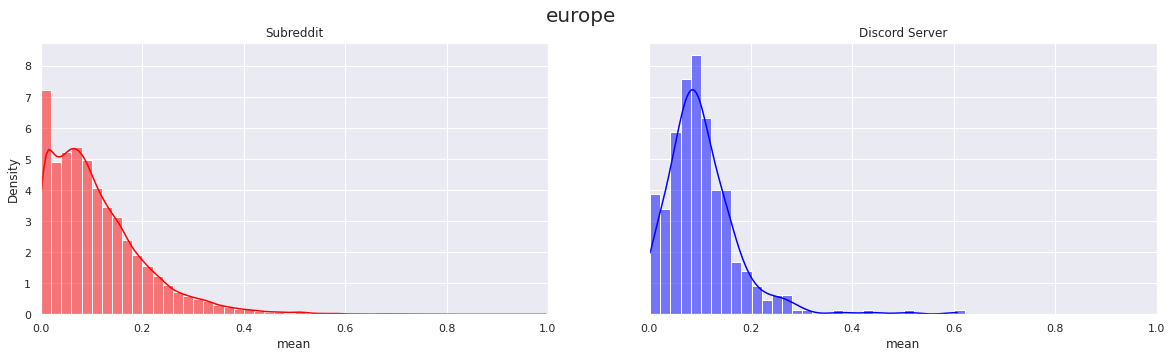

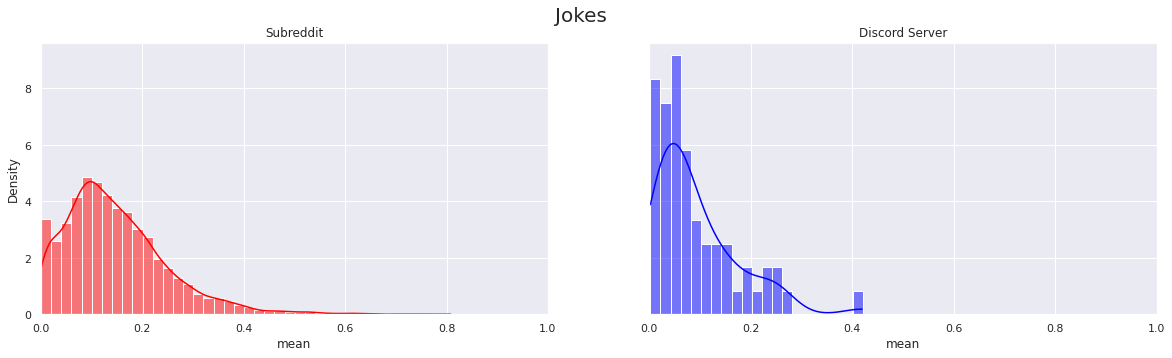

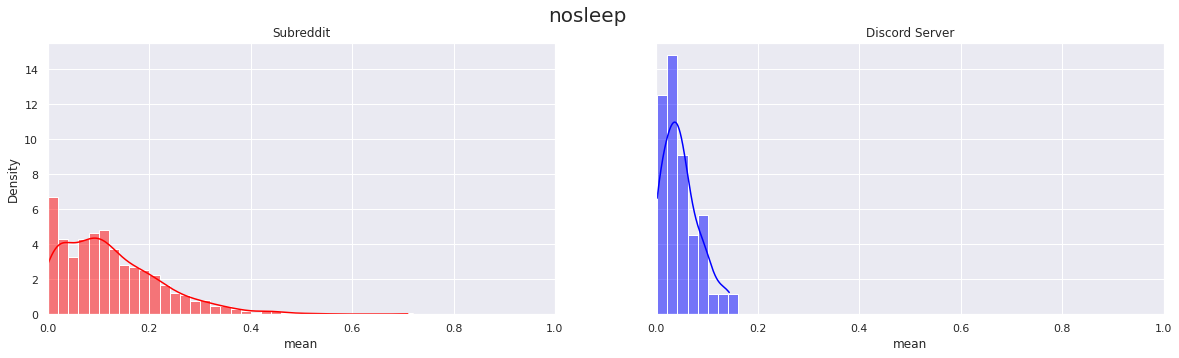

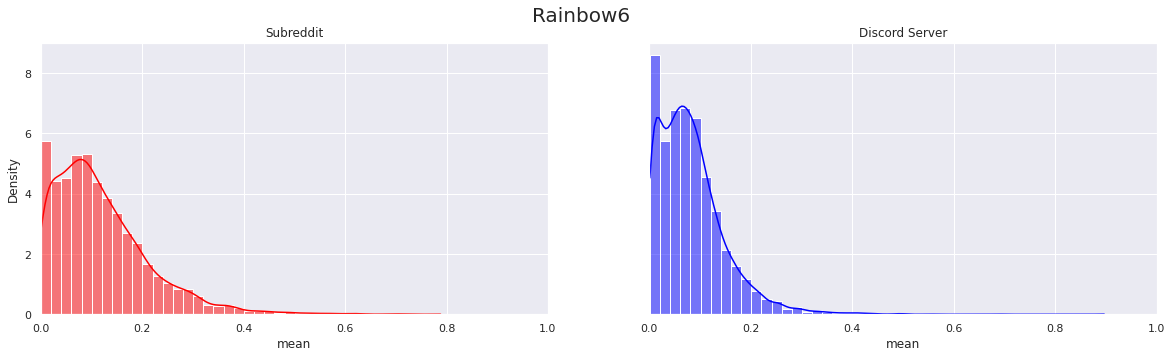

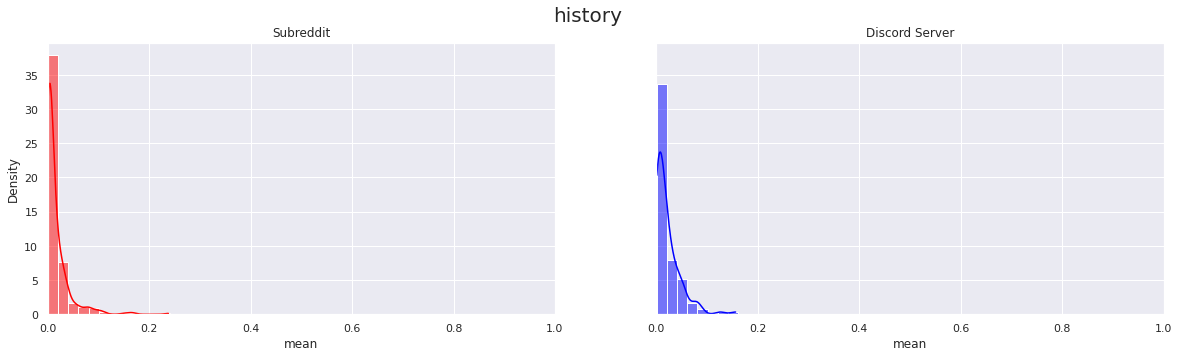

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  """


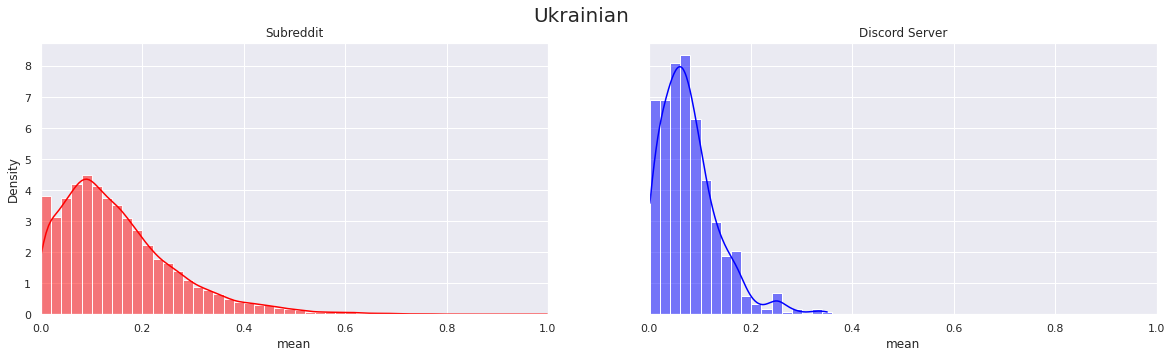

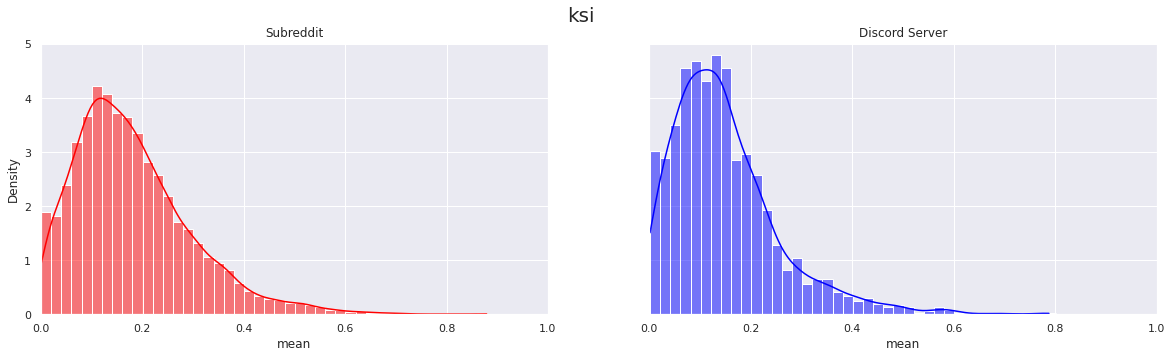

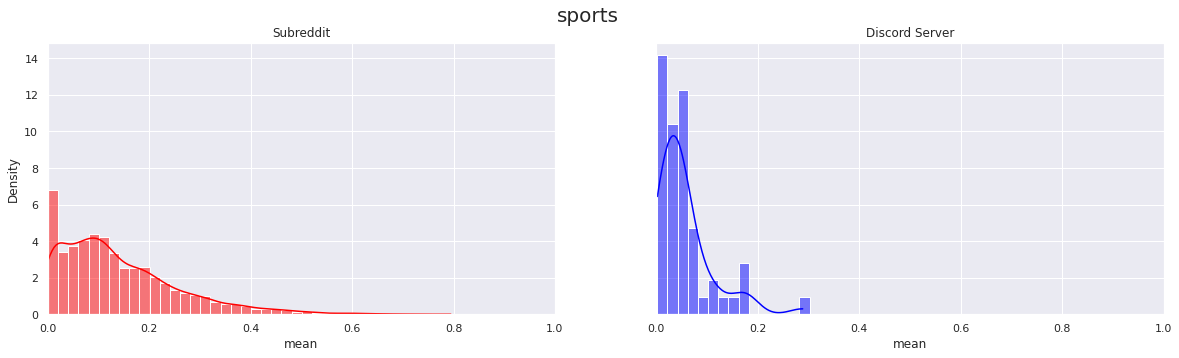

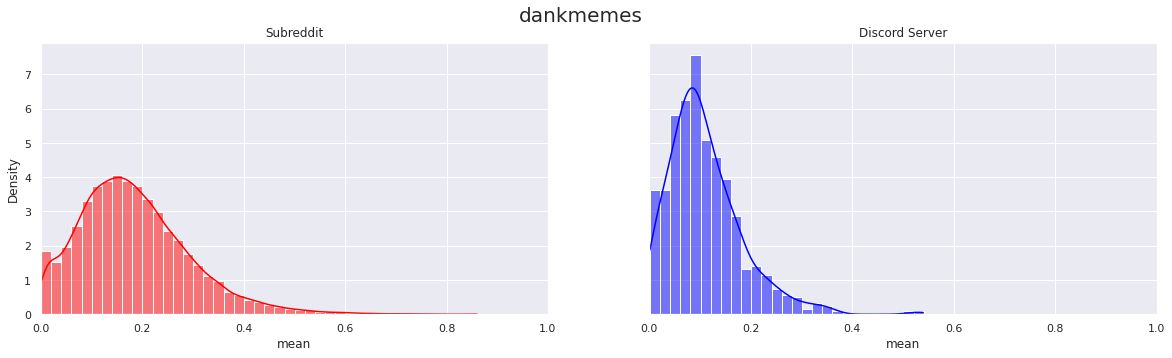

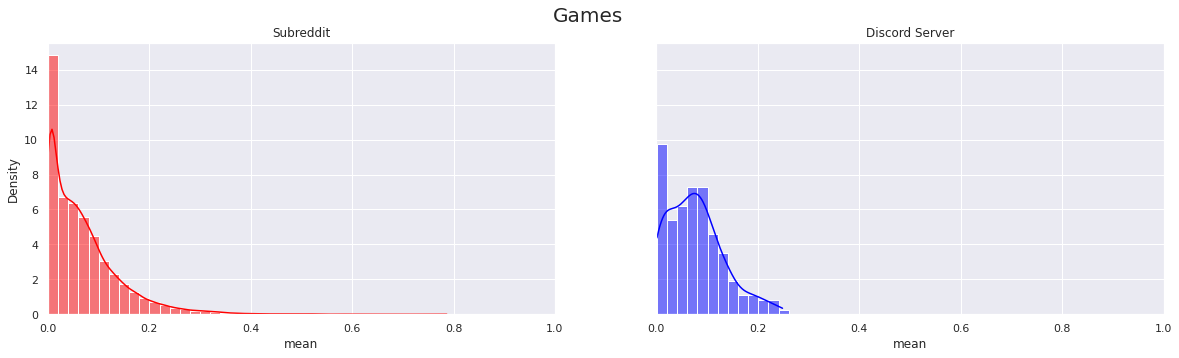

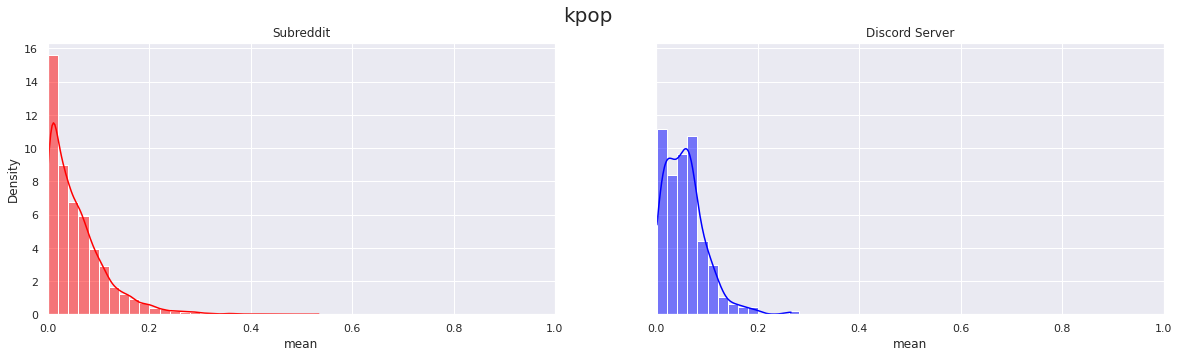

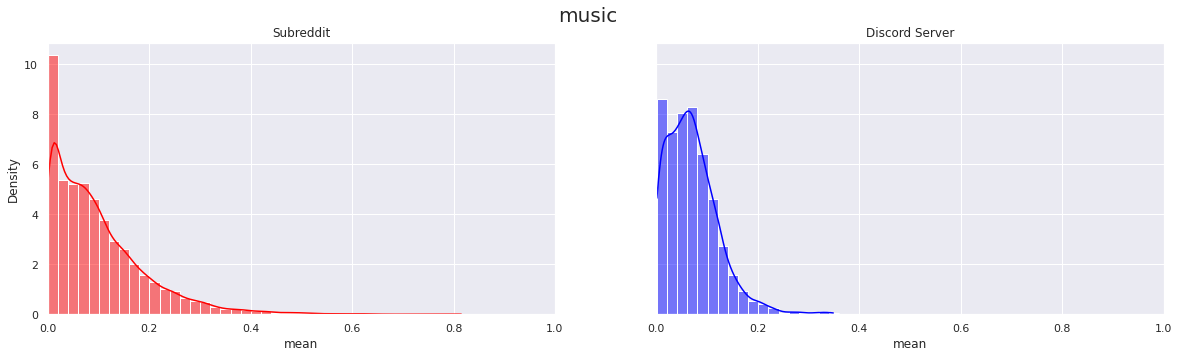

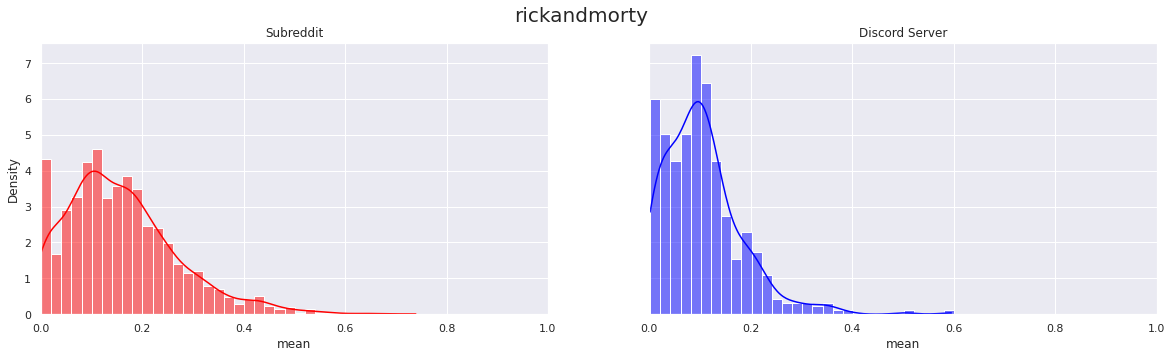

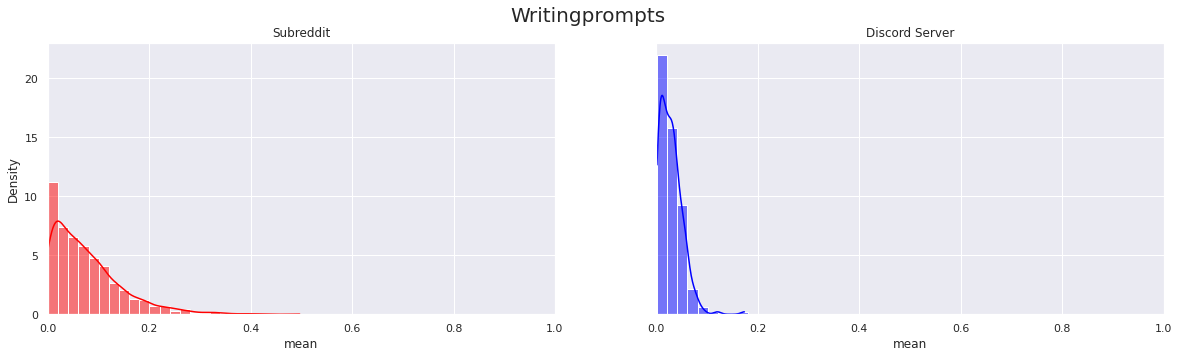

time: 3min 37s (started: 2022-11-29 17:31:32 +00:00)


In [ ]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']

for community_name in community_names:
  plot_authors_toxicity(community_name_x=community_name, agg_x='mean')

# Skewness

In [ ]:
from scipy.stats import skew

def get_community_skewness(community_name_x, agg_x='mean'):
  if agg_x == 'mean':
    binwidth_x = 0.02
  if agg_x == 'sum':
    binwidth_x = None


  data_reddit=pd.read_csv(f'{my_dir}Datasets/reddit/{community_name_x}_subreddit_hate.csv', lineterminator='\n')
  data_discord=pd.read_csv(f'{my_dir}Datasets/discord/{community_name_x}_discord_hate.csv', lineterminator='\n')

  data_reddit=clean_df(data_reddit,text_col='comment_text',author_col='author')
  data_discord=clean_df(data_discord,text_col='content',author_col='author_username')

  data_reddit_authors = data_reddit.groupby(by=['author'])['Toxic_BERT'].agg([agg_x, 'count']).reset_index()
  data_reddit_authors = data_reddit_authors[data_reddit_authors['count'] >= 10]


  data_discord_authors = data_discord.groupby(by=['author_username'])['Toxic_BERT'].agg([agg_x, 'count']).reset_index()
  data_discord_authors = data_discord_authors[data_discord_authors['count'] >= 10]

  return {'community_name': community_name_x, 'Reddit Skewness':skew(data_reddit_authors['mean']), 'Discord Skewness':skew(data_discord_authors['mean'])}

time: 33 ms (started: 2022-12-07 19:04:51 +00:00)


In [ ]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']

data_skewness = pd.DataFrame()

for community_name in community_names:
  data_skewness = data_skewness.append(get_community_skewness(community_name_x=community_name),ignore_index=True)




<ipython-input-19-f789250700f2>:7: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  data_skewness = data_skewness.append(get_community_skewness(community_name_x=community_name),ignore_index=True)


time: 3min 49s (started: 2022-12-07 17:52:32 +00:00)


In [ ]:
data_skewness

,community_name,Reddit Skewness,Discord Skewness
0,Overwatch,1.547950,1.668545
1,europe,1.615402,2.364917
2,Jokes,1.243984,1.565378
3,nosleep,1.317241,0.835818
4,Rainbow6,1.489542,1.846319
5,history,3.869001,2.335279
6,Ukrainian,1.386109,1.334694
7,ksi,1.115679,1.521655
8,sports,1.261898,2.063938
9,dankmemes,0.947114,1.417837


time: 19.9 ms (started: 2022-12-07 17:58:04 +00:00)


# Toxicity Rate

In [ ]:
def get_binary_toxicity(value_x, cutoff_x=0.5):
  if value_x >= 0.5:
    return 1
  if value_x < 0.5:
    return 0

def get_top_percentage_share(data_x, value_col, top_percent=0.05):
  grand_total = data_x[value_col].sum()
  data_x['freq_pct'] = data_x[value_col].rank(pct=True)
  top_percent_total = data_x[data_x['freq_pct']>(1-top_percent)][value_col].sum()
  return top_percent_total/grand_total



def get_community_top_toxicity_share(community_name_x, agg_x='sum'):

  data_reddit=pd.read_csv(f'{my_dir}Datasets/reddit/{community_name_x}_subreddit_hate.csv', lineterminator='\n')
  data_discord=pd.read_csv(f'{my_dir}Datasets/discord/{community_name_x}_discord_hate.csv', lineterminator='\n')

  data_reddit = clean_df(data_reddit,text_col='comment_text',author_col='author')
  data_discord = clean_df(data_discord,text_col='content',author_col='author_username')


  data_reddit['Binary_Toxic_BERT'] = data_reddit['Toxic_BERT'].map(get_binary_toxicity)
  data_reddit_authors = data_reddit.groupby(by=['author'])['Binary_Toxic_BERT'].agg([agg_x, 'count']).reset_index()
  data_reddit_authors = data_reddit_authors[data_reddit_authors['count'] >= 10]

  data_discord['Binary_Toxic_BERT'] = data_discord['Toxic_BERT'].map(get_binary_toxicity)
  data_discord_authors = data_discord.groupby(by=['author_username'])['Binary_Toxic_BERT'].agg([agg_x, 'count']).reset_index()
  data_discord_authors = data_discord_authors[data_discord_authors['count'] >= 10]

  return {'Community Name': community_name_x,
          'Reddit Toxicity':data_reddit['Binary_Toxic_BERT'].mean(),
          'Discord Toxicity':data_discord['Binary_Toxic_BERT'].mean(),
          'Reddit Top Share':get_top_percentage_share(data_x = data_reddit_authors, value_col = 'sum', top_percent=0.05),
          'Discord Top Share':get_top_percentage_share(data_x = data_discord_authors, value_col = 'sum', top_percent=0.05)}

time: 6.5 ms (started: 2022-12-12 16:32:46 +00:00)


In [ ]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']

data_top_share = pd.DataFrame()

for community_name in community_names:
  print(f'beginning {community_name}')
  data_top_share = data_top_share.append(get_community_top_toxicity_share(community_name_x=community_name),ignore_index=True)


beginning Overwatch
beginning europe
beginning Jokes
beginning nosleep
beginning Rainbow6
beginning history
beginning Ukrainian


<ipython-input-15-d331ee75df21>:8: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  data_top_share = data_top_share.append(get_community_top_toxicity_share(community_name_x=community_name),ignore_index=True)


beginning ksi
beginning sports
beginning dankmemes
beginning Games
beginning kpop
beginning music
beginning rickandmorty
beginning Writingprompts
time: 4min 7s (started: 2022-12-12 16:33:49 +00:00)


In [ ]:
list(data_top_share.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

time: 5.6 ms (started: 2022-12-12 16:46:23 +00:00)


In [ ]:
data_top_share.to_excel('/content/drive/MyDrive/Discord-Reddit/Datasets/platform_toxicity_top_share.xlsx')

time: 1.22 s (started: 2022-12-12 16:45:12 +00:00)


In [ ]:
data_top_share=pd.read_excel('/content/drive/MyDrive/Discord-Reddit/Datasets/platform_toxicity_top_share.xlsx')

time: 390 ms (started: 2022-12-22 15:35:31 +00:00)


In [ ]:
data_top_share.at[6,'Community Name']='Ukrainian-\nConflict'

time: 940 µs (started: 2022-12-22 15:38:36 +00:00)


In [ ]:
data_top_share.at[6,'Community Name']

'Ukrainian-\nConflict'

time: 13 ms (started: 2022-12-22 15:38:43 +00:00)


In [ ]:
data_top_share['Reddit Toxicity']*(1-data_top_share['Reddit Top Share'])

0     0.055597
1     0.053023
2     0.095320
3     0.067085
4     0.070553
5     0.009893
6     0.079435
7     0.116071
8     0.103418
9     0.122366
10    0.038385
11    0.028027
12    0.059980
13    0.106071
14    0.039628
dtype: float64

time: 20.4 ms (started: 2022-12-13 09:06:09 +00:00)


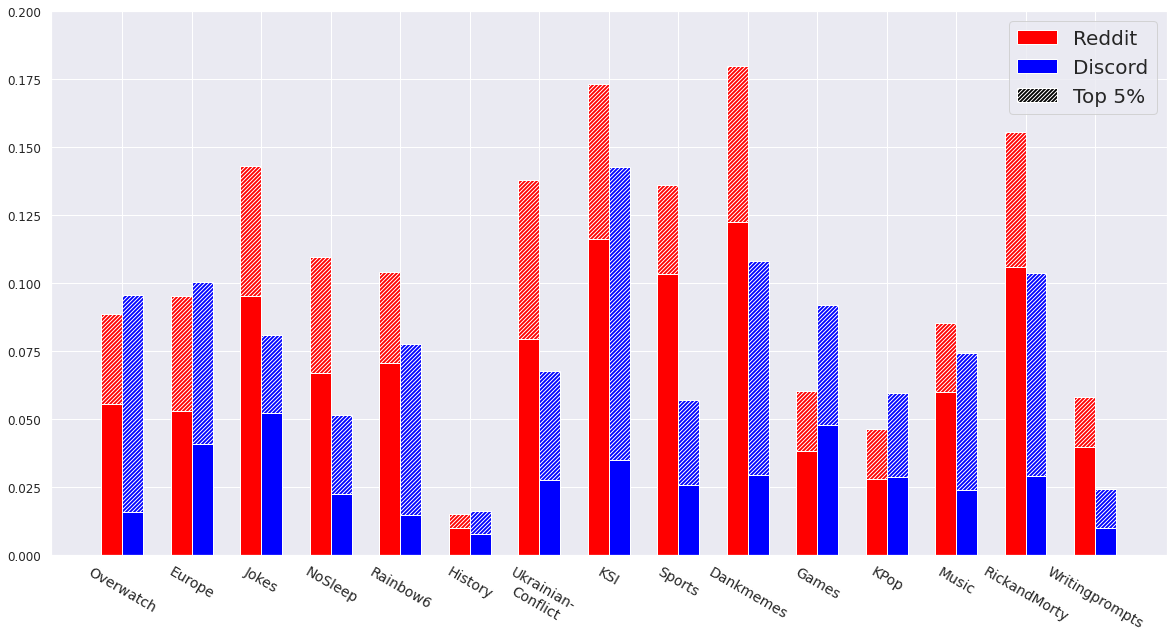

time: 3.76 s (started: 2022-12-22 15:39:13 +00:00)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

hatch_level = '//////'
width = 0.3
custom_lines = [Patch(facecolor='red'),
                Patch(facecolor='blue'),
                Patch(facecolor='black', hatch=hatch_level)]
%matplotlib inline
# fig, ax = plt.subplots()
fig = plt.figure(figsize=(20, 10))

reddit_bar_list = [plt.bar(list(data_top_share['Community Name']), data_top_share['Reddit Toxicity']*(1-data_top_share['Reddit Top Share']), align='edge', width= -width, label='Other',color='red'),
               plt.bar(list(data_top_share['Community Name']), data_top_share['Reddit Toxicity']*data_top_share['Reddit Top Share'],bottom=data_top_share['Reddit Toxicity']*(1-data_top_share['Reddit Top Share']), align='edge', width= -width,label='Top',color='red',hatch=hatch_level)]

discord_bar_list = [plt.bar(list(data_top_share['Community Name']), data_top_share['Discord Toxicity']*(1-data_top_share['Discord Top Share']), align='edge',width= width,label='Other',color='blue'),
               plt.bar(list(data_top_share['Community Name']), data_top_share['Discord Toxicity']*data_top_share['Discord Top Share'],bottom=data_top_share['Discord Toxicity']*(1-data_top_share['Discord Top Share']), align='edge',width= width, label='Top',color='blue',hatch=hatch_level)]

plt.ylim([0,0.2])
plt.xticks(fontsize=14, rotation=-30)
plt.yticks(fontsize=12, rotation=0)

plt.legend(custom_lines,['Reddit','Discord','Top 5%'],prop={'size': 20})
plt.savefig(my_dir+f"Charts/Platform_Toxicity", bbox_inches = 'tight',format="jpeg", dpi=400, pad_inches = 0)

In [ ]:
Line2D([0], [0], color='black',linestyle='/', lw=4)

ValueError: ignored

time: 23.7 ms (started: 2022-12-13 10:38:39 +00:00)


# Dark Jargons

In [ ]:
degratory=pd.read_excel('/content/drive/MyDrive/Meme Polarity Detection/Datasets/WeaponizedWord/WeaponizedWord_lexicons_derogatory.xlsx')
discriminatory=pd.read_excel('/content/drive/MyDrive/Meme Polarity Detection/Datasets/WeaponizedWord/WeaponizedWord_lexicons_discriminatory.xlsx')
threatening=pd.read_excel('/content/drive/MyDrive/Meme Polarity Detection/Datasets/WeaponizedWord/WeaponizedWord_lexicons_threatening.xlsx')
watchwords=pd.read_excel('/content/drive/MyDrive/Meme Polarity Detection/Datasets/WeaponizedWord/WeaponizedWord_lexicons_watchwords.xlsx')

time: 5.55 s (started: 2022-12-15 14:07:55 +00:00)


In [ ]:
darkwords_df=pd.concat([degratory,discriminatory,threatening,watchwords],ignore_index=True)

time: 19.5 ms (started: 2022-12-15 14:10:50 +00:00)


In [ ]:
darkwords_df

,Unnamed: 0,term,term_id,variant_of,variant_of_id,plural_of,plural_of_id,romanization_of,romanization_of_id,language_id,...,is_about_ethnicity,athnicities,is_about_religion,religions,is_about_gender,genders,is_about_orientation,orientations,is_about_disability,is_about_class
0,0,mudbloods,lLwNBAhnL,NaN,NaN,mudblood,pWwLhZjsK,NaN,NaN,eng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,mudblood,pWwLhZjsK,NaN,NaN,NaN,NaN,NaN,NaN,eng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,nize it,VREPDZYoH,NaN,NaN,NaN,NaN,NaN,NaN,eng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,sus,uKAg9Peaa,NaN,NaN,NaN,NaN,NaN,NaN,eng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,waste yute,hatyxwpag,NaN,NaN,NaN,NaN,NaN,NaN,eng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,867,ලොඳ කැරියා,BGKXMYNfW,NaN,NaN,NaN,NaN,NaN,NaN,sin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7373,868,කද,brjo2aeNw,NaN,NaN,NaN,NaN,NaN,NaN,sin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7374,869,කඳ,MFzRs9XpT,NaN,NaN,NaN,NaN,NaN,NaN,sin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7375,870,நடத்தை கெட்டது,VgWJQ2WcP,NaN,NaN,NaN,NaN,NaN,NaN,tam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


time: 96.3 ms (started: 2022-12-15 14:19:47 +00:00)


In [ ]:
import re
words_re = re.compile("|".join(list_of_words))

if words_re.search('hey mudbloods'):
  print(word)

NameError: ignored

time: 751 ms (started: 2022-12-15 14:19:55 +00:00)


In [ ]:
[word for word in list(darkwords_df['term']) if bool(re.search('\\b'+word+'\\b', 'you are shit'))]

['shit']

time: 660 ms (started: 2022-12-15 14:44:34 +00:00)


In [ ]:
[word for word in 'you are idiot shit'.split() if word in list(darkwords_df['term'])]

['idiot', 'shit']

time: 19.7 ms (started: 2022-12-15 14:47:20 +00:00)


In [ ]:
bool(re.search('\\bmud\\b', 'mud blodod'))==True

True

time: 4.25 ms (started: 2022-12-15 14:43:19 +00:00)


In [ ]:
def get_binary_toxicity(value_x, cutoff_x=0.5):
  if value_x >= 0.5:
    return 1
  if value_x < 0.5:
    return 0


dark_jargons_list=list(darkwords_df['term'])
def get_darktermed_sentences(community_name_x):

  data_reddit=pd.read_csv(f'{my_dir}Datasets/reddit/{community_name_x}_subreddit_hate.csv', lineterminator='\n')
  data_discord=pd.read_csv(f'{my_dir}Datasets/discord/{community_name_x}_discord_hate.csv', lineterminator='\n')

  data_reddit = clean_df(data_reddit,text_col='comment_text',author_col='author')
  data_discord = clean_df(data_discord,text_col='content',author_col='author_username')


  data_reddit['Binary_Toxic_BERT'] = data_reddit['Toxic_BERT'].map(get_binary_toxicity)
  data_reddit_sample = data_reddit[data_reddit['Binary_Toxic_BERT']>0.5].sample(5000, random_state=1)
  data_reddit_sample['dark_jargons'] = data_reddit_sample['comment_text'].progress_apply(lambda x: [word for word in x.split() if word in dark_jargons_list])
  reddit_dark_n = len(data_reddit_sample[data_reddit_sample['dark_jargons'].map(len)>=1])
  print(f'reddit {reddit_dark_n/len(data_reddit_sample)}')


  data_discord['Binary_Toxic_BERT'] = data_discord['Toxic_BERT'].map(get_binary_toxicity)
  data_discord_sample = data_discord[data_discord['Binary_Toxic_BERT']>0.5].sample(5000, random_state=1)
  data_discord_sample['dark_jargons'] = data_discord_sample['content'].progress_apply(lambda x: [word for word in x.split() if word in dark_jargons_list])
  discord_dark_n = len(data_discord_sample[data_discord_sample['dark_jargons'].map(len)>=1])
  print(f'discord {discord_dark_n/len(data_discord_sample)}')

time: 15.1 ms (started: 2022-12-15 15:17:19 +00:00)


In [ ]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
  'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']

# data_top_share = pd.DataFrame()

for community_name_i in community_names:
  print(f'\nbeginning {community_name_i}')
  get_darktermed_sentences(community_name_x=community_name_i)


beginning Overwatch


  0%|          | 0/5000 [00:00<?, ?it/s]

reddit 0.5222


  0%|          | 0/5000 [00:00<?, ?it/s]

discord 0.3942
beginning europe


  0%|          | 0/5000 [00:00<?, ?it/s]

reddit 0.4982


  0%|          | 0/5000 [00:00<?, ?it/s]

discord 0.4528
beginning Jokes


  0%|          | 0/5000 [00:00<?, ?it/s]

reddit 0.3394


ValueError: ignored

time: 2min 13s (started: 2022-12-15 15:18:57 +00:00)
